<a href="https://colab.research.google.com/github/rabbyislam1128/20-43644-2/blob/main/assignment_1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!git clone https://github.com/YoongiKim/CIFAR-10-images.git

fatal: destination path 'CIFAR-10-images' already exists and is not an empty directory.


In [50]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Dataset and Preprocessing:

In [51]:
TRAIN_DATA_DIR = '/content/CIFAR-10-images/train'
IMG_SIZE = 32
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
print(CATEGORIES)

['automobile', 'dog', 'bird', 'truck', 'deer', 'cat', 'horse', 'airplane', 'ship', 'frog']


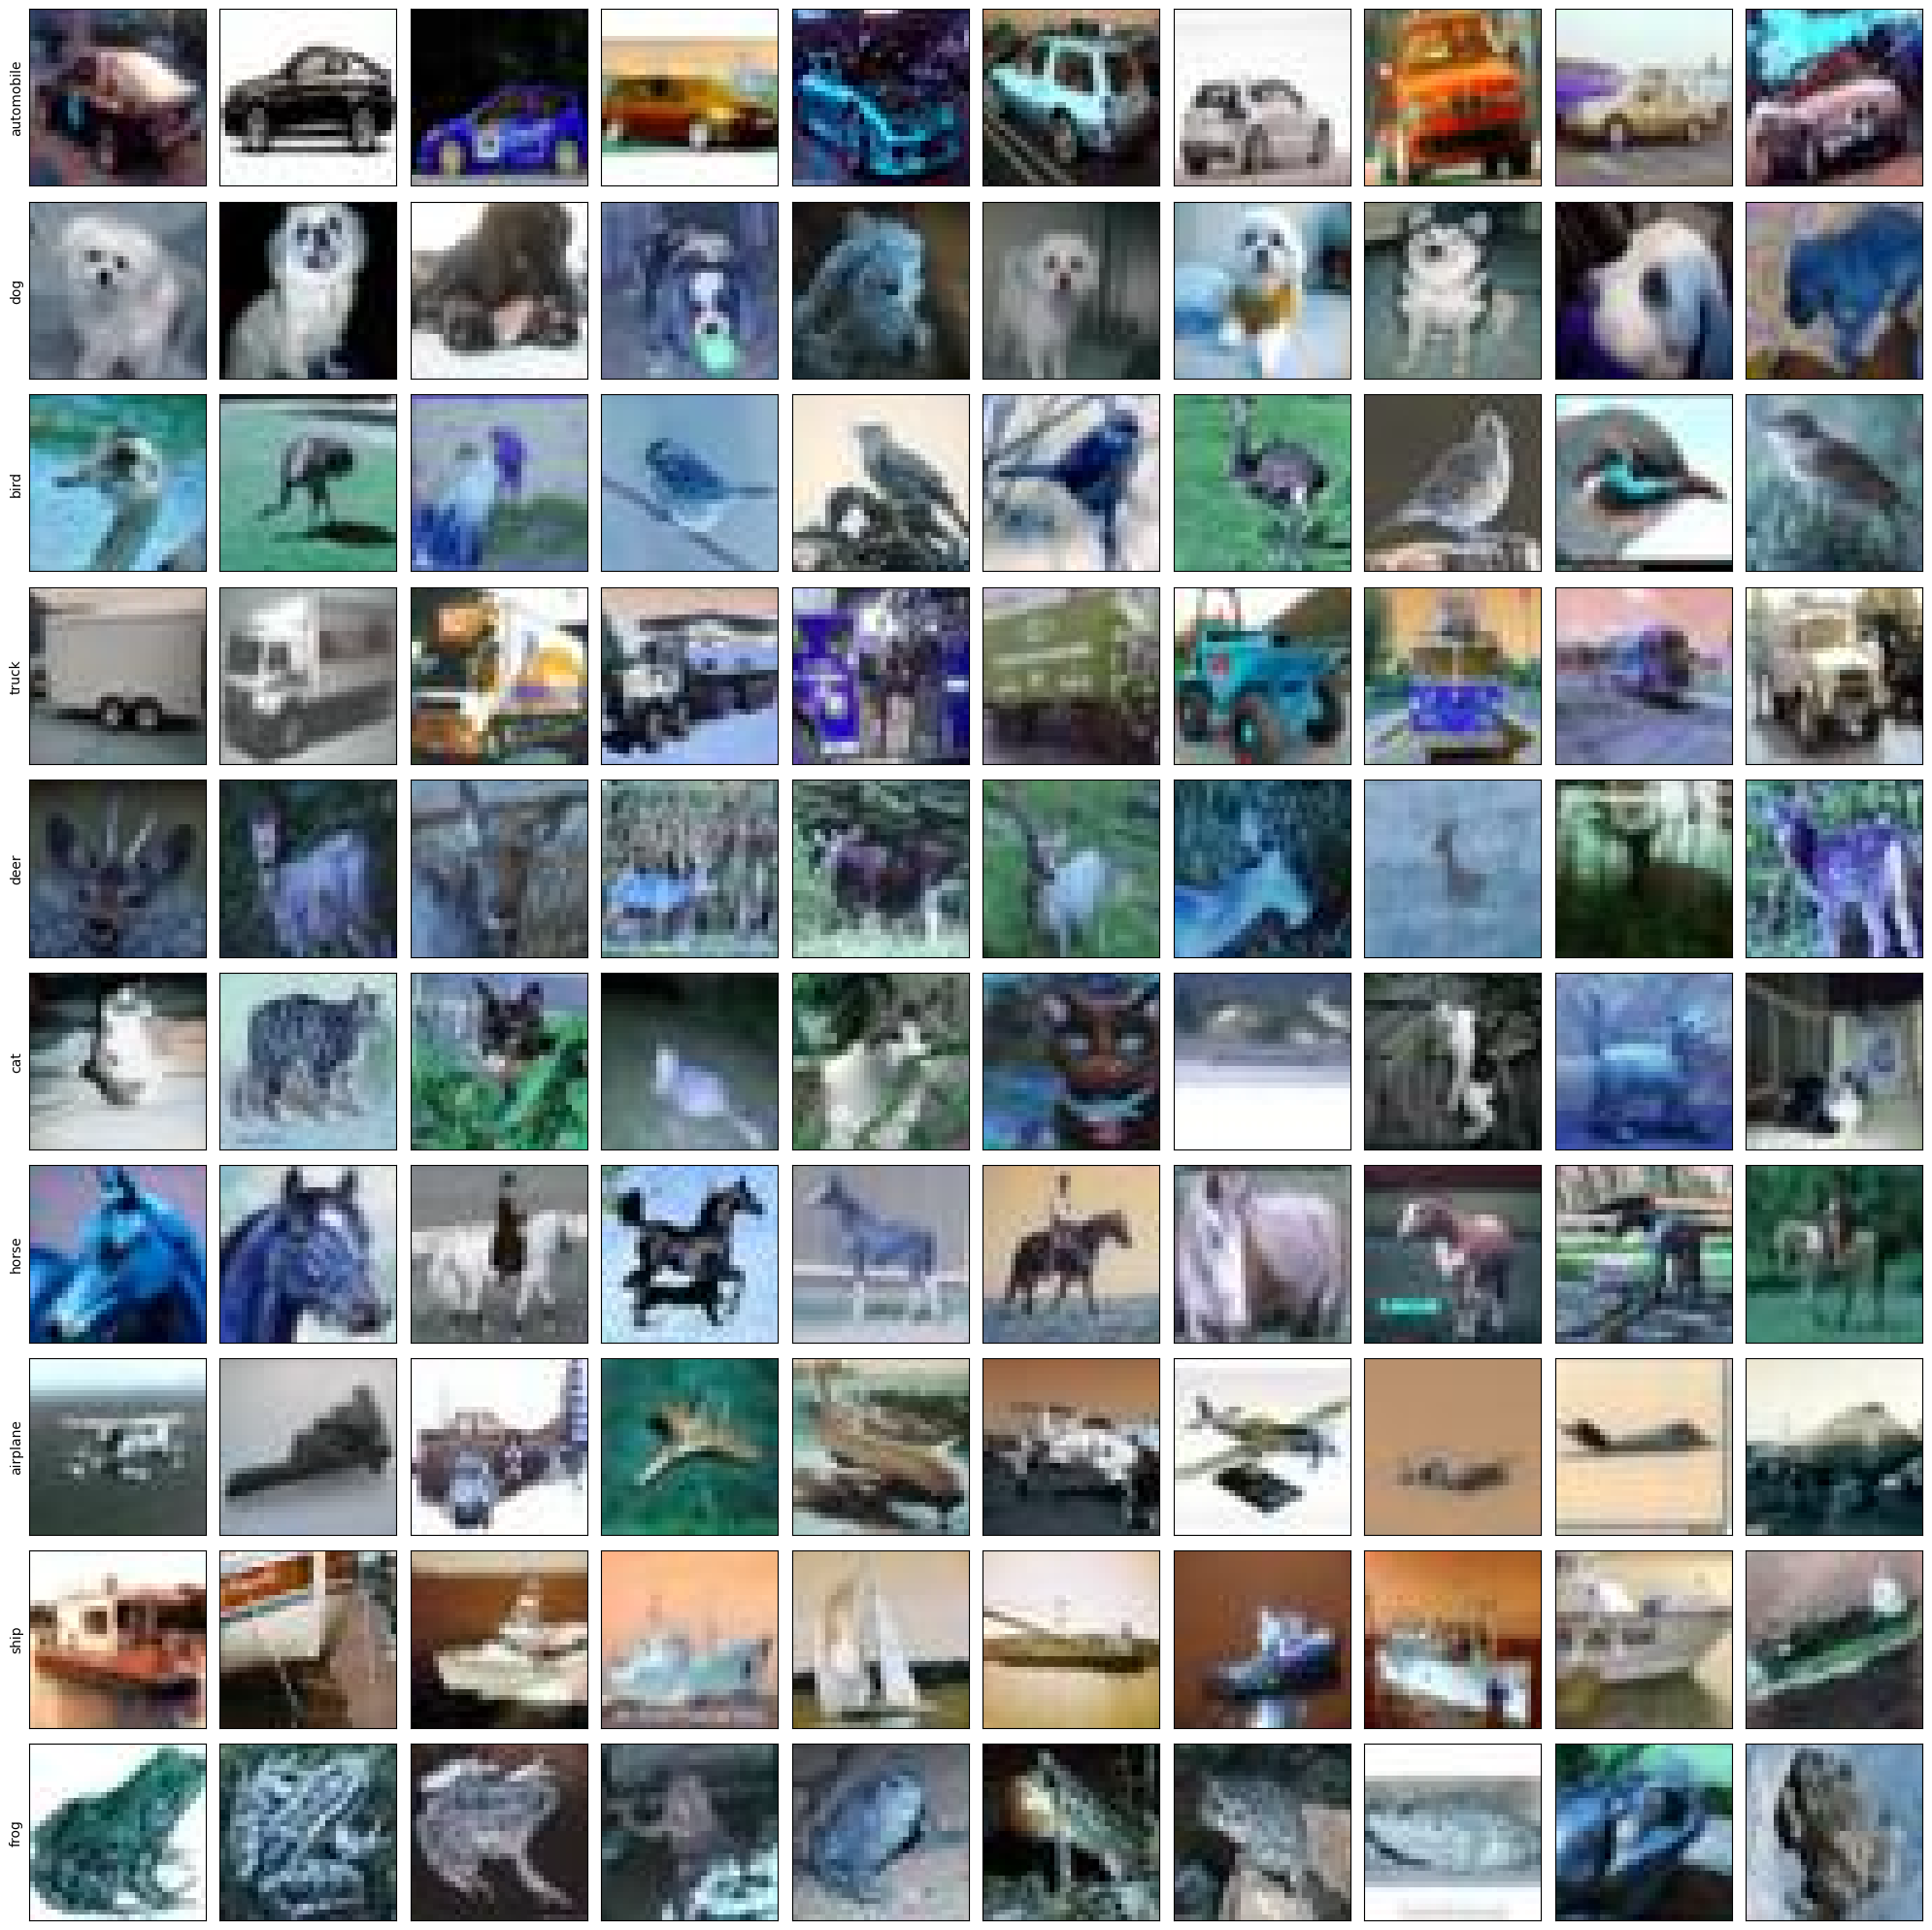

In [52]:
plt.figure(figsize=(20,20))
i=0
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(10,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()
plt.show()


In [53]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)    # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([np.reshape(img_resized, IMG_SIZE*IMG_SIZE), class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass

print(len(training_data))

100%|██████████| 5000/5000 [00:00<00:00, 16633.16it/s]

50000


Model Building and Evaluation:

In [54]:
f0=training_data[0:1000]
f1=training_data[1000:2000]
f2=training_data[2000:3000]
f3=training_data[3000:4000]
f4=training_data[4000:5000]

In [55]:
class NearestNeighbour:

    def __init__(self,k,distancemetric="l2"):
        self.K = k
        self.trainSet = None
        self.distanceMetric = distancemetric.lower()

    def fit(self,train):
        self.trainSet = train

    # Calculating L2 distance
    def __L2_distance(self, train_img,test_img):
        temp = train_img - test_img
        dis = np.sqrt(np.sum(np.square(temp)))
        return dis

    # function to calculate the distance
    def __distanceCalculator(self,validate):
        accuracy = 0
        for vidx in range(len(validate)):
            distnaceList = []
            cnt = 0
            for tidx in range(len(self.trainSet)):
                d = 0
                if self.distanceMetric == 'l2':
                    d = self.__L2_distance(self.trainSet[tidx][0],validate[vidx][0])
                distnaceList.append((d,self.trainSet[tidx][1]))
            # sorting the distance array
            distnaceList.sort(key=(lambda a: a[0]))
            labels = [v[1] for v in distnaceList[:self.K]]
            label = max(set(labels), key = labels.count)

            if label == validate[vidx][1]:
                cnt+=1

            accuracy += cnt

        return accuracy, (accuracy/len(validate))

    #Function prediction
    def predict(self,validate):
        return self.__distanceCalculator(validate)

In [56]:
def plot_Accuracies(fold,k_choices,accuracies):
    best = [0,0]
    for k in k_choices:
        accu = accuracies[k]
        if best[1]< max(accu):
            best[0]=k
            best[1]=max(accu)
        plt.scatter([k] * len(accu), accu)

    # plot the trend line with error bars that correspond to standard deviation

    accuracies_mean = np.array([np.mean(v) for k,v in sorted(accuracies.items())])
    accuracies_std = np.array([np.std(v) for k,v in sorted(accuracies.items())])
    plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()

In [59]:
k_choices = [1, 3, 5, 7, 9, 11, 13]

In [60]:
accuracis = {}
nfolds = 5
# creating the dictonary of k with empty list
for k in k_choices:
    accuracis[k]=[]

for i in range(nfolds):
    if i==0:
        trainSet = f1+f2+f3+f4
        validate = f0
    elif i==1:
        trainSet = f0+f2+f3+f4
        validate = f1
    elif i==2:
        trainSet = f1+f0+f3+f4
        validate = f2
    elif i==3:
        trainSet = f1+f2+f0+f4
        validate = f3
    elif i==4:
        trainSet = f1+f2+f3+f0
        validate = f4

    for k in k_choices:

        classifier = NearestNeighbour(k,'l2')
        classifier.fit(trainSet)
        cnt, acc = classifier.predict(validate)

        accuracis[k].append(acc)

KeyboardInterrupt: ignored

In [ ]:
plot_Accuracies(5,k_choices,accuracis)